# Discriminant Analysis

Discriminant analysis is a statistical technique used to classify observations into one of several predetermined classes based on a set of predictors. 

In [1]:
import numpy as np
import pandas as pd
pd.set_option('display.max_columns', 8)
import seaborn as sns; sns.set()
sns.set(rc={"figure.figsize":(6, 4)})   # width=6, height=4

In [2]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

## A Simple Discriminant Model

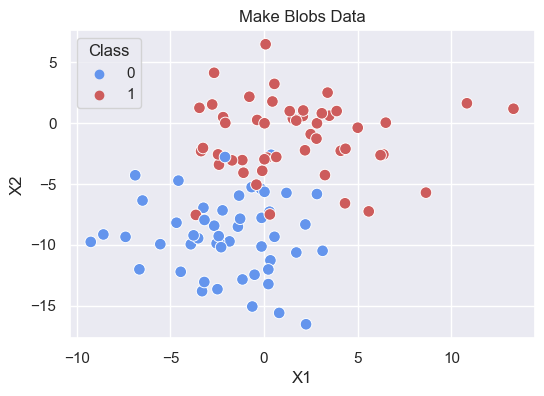

In [3]:
# The data
X, cl = make_blobs(n_samples=100, n_features=2, centers=2, random_state=2, cluster_std=3)
dfb = pd.DataFrame()
dfb['X1'] = X[:,0]
dfb['X2'] = X[:,1]
dfb['Class'] = cl
sns.scatterplot(x=dfb.X1, y=dfb.X2, s=70, hue=dfb.Class, 
                palette=['cornflowerblue', 'indianred']).set_title("Make Blobs Data");

In [4]:
X = dfb[['X1','X2']]    # Feature Matrix
y = dfb.Class           # Target variable

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(X_train), len(X_test)))

Train = 80 cases 	 Test = 20 cases


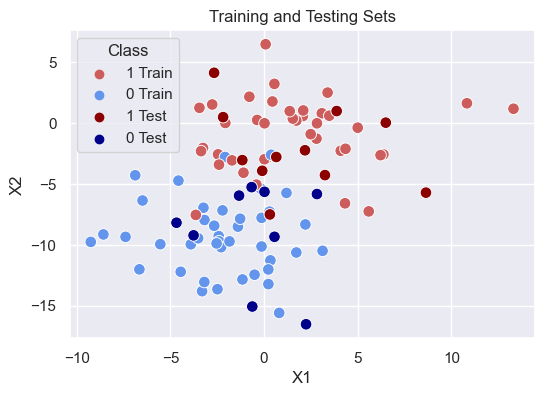

In [6]:
# Graphing the training and test sets
sns.scatterplot(x=X_train.X1, y=X_train.X2, s=70, hue=y_train.replace({0:'0 Train', 1:'1 Train'}), 
                palette=['indianred', 'cornflowerblue'])
sns.scatterplot(x=X_test.X1,  y=X_test.X2,  s=70, hue=y_test.replace({0:'0 Test', 1:'1 Test'}),    
                palette=['darkred', 'darkblue']).set_title("Training and Testing Sets");

In [7]:
# Saving training and testing data
data_train = pd.concat([X_train, y_train], axis=1)
data_test  = pd.concat([X_test, y_test], axis=1)

In [8]:
# Initialize discriminant analysis model
lda = LinearDiscriminantAnalysis()

In [9]:
# Train the model
lda.fit(X=X_train, y=y_train)

LinearDiscriminantAnalysis()

In [10]:
print('    Coefficients:', lda.coef_.round(3))
print('    Intercept:   ', lda.intercept_.round(3))

    Coefficients: [[0.33  0.962]]
    Intercept:    [4.999]


In [11]:
# Predictions with training cases (sl stands for Scikit-Learn library) 
prob = lda.predict_proba(X_train).round(3)
data_train['prob_0_sl'] = prob[:,0]
data_train['prob_1_sl'] = prob[:,1]
data_train['Class_sl'] = lda.predict(X_train)
data_train.head()

,X1,X2,Class,prob_0_sl,prob_1_sl,Class_sl
85,-2.459759,-2.573120,1,0.153,0.847,1
28,1.194007,-5.736837,0,0.532,0.468,0
8,-3.239853,-6.954107,0,0.941,0.059,0
11,4.999948,-0.385664,1,0.002,0.998,1
63,0.080990,6.462332,1,0.000,1.000,1


In [12]:
# Predictions on unseen cases (sl stands for Scikit-Learn library) 
prob = lda.predict_proba(X_test)
data_test['prob_0_sl'] = prob[:,0]
data_test['prob_1_sl'] = prob[:,1]
data_test['Class_sl']  = lda.predict(X_test)
data_test.head()

,X1,X2,Class,prob_0_sl,prob_1_sl,Class_sl
26,-0.100188,-3.921491,1,0.232972,0.767028,1
80,2.240493,-16.512285,0,0.999961,0.000039,0
82,8.644564,-5.713072,1,0.087129,0.912871,1
68,2.182810,-2.237404,1,0.027521,0.972479,1
77,-3.767508,-9.218345,0,0.994031,0.005969,0


In [13]:
# Generating new data
new_data = pd.DataFrame()
new_data['X1'] = np.random.uniform(data_train.X1.min(), data_train.X1.max(), size=1000)
new_data['X2'] = np.random.uniform(data_train.X2.min(), data_train.X2.max(), size=1000)
new_y  = lda.predict(new_data)
new_data['y'] = new_y

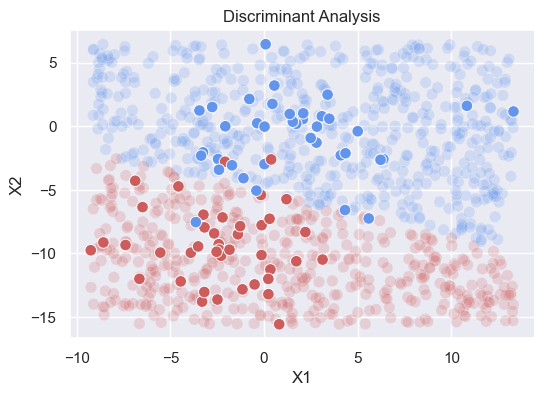

In [14]:
# Plotting boundaries
sns.scatterplot(x=new_data.X1,  y=new_data.X2, s=70, hue=new_data.y, alpha=0.2, palette=['indianred', 'cornflowerblue'], 
                legend=False).set_title("Discriminant Analysis")
sns.scatterplot(x=X_train.X1, y=X_train.X2, s=70, hue=y_train, palette=['indianred', 'cornflowerblue'], legend=False);
#sns.scatterplot(x=X_test.X1,  y=X_test.X2, s=70, hue=y_test, palette=['darkred', 'darkblue'], legend=False);

A confusion matrix is a table used to evaluate the performance of a classification model by comparing the predicted and actual class labels of a set of test data.

Cases on the main diagonal are correctly classified.

In [15]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test.Class,          # True labels
                         y_pred=data_test.Class_sl)       # Predicted labels

array([[ 8,  1],
       [ 1, 10]], dtype=int64)

Classification accuracy is a performance metric that measures how well a classification model can accurately classify or predict the correct class label for a given input. It is the ratio of correctly classified instances to the total number of cases in the dataset.

In [16]:
# The accuracy
print('Training Set Accuracy = %.3f' %(lda.score(X=X_train, y=y_train)))
print('Testing Set  Accuracy = %.3f' %(lda.score(X=X_test,  y=y_test)))

Training Set Accuracy = 0.938
Testing Set  Accuracy = 0.900


## Discriminant Analysis: Raisin Dataset

The dataset contains information about two varieties of raisins (Kecimen and Besni) grown in Turkey.

In [17]:
dfr = pd.read_csv('Raisin.csv')
print(dfr.shape)
dfr.head()

(900, 8)


,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter,Class
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040,Kecimen
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786,Kecimen
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575,Kecimen
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162,Kecimen
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251,Kecimen


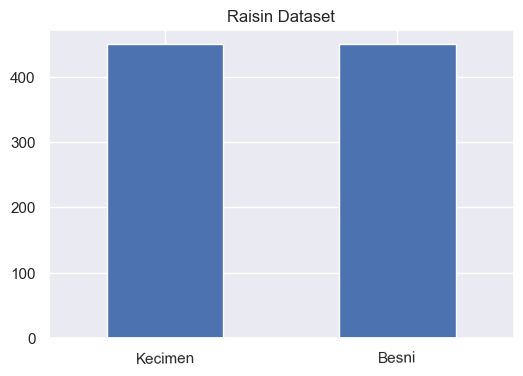

In [18]:
dfr.Class.value_counts().plot(kind='bar', rot=True, title='Raisin Dataset');

In [19]:
# Recoding the class variable
label_to_number = {'Kecimen': 0, 'Besni': 1}
dfr['Besni'] = dfr['Class'].map(label_to_number)
dfr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,...,Extent,Perimeter,Class,Besni
0,87524,442.246011,253.291155,0.819738,...,0.758651,1184.040,Kecimen,0
1,75166,406.690687,243.032436,0.801805,...,0.684130,1121.786,Kecimen,0
2,90856,442.267048,266.328318,0.798354,...,0.637613,1208.575,Kecimen,0
3,45928,286.540559,208.760042,0.684989,...,0.699599,844.162,Kecimen,0
4,79408,352.190770,290.827533,0.564011,...,0.792772,1073.251,Kecimen,0


In [20]:
# Target variable
yr = dfr.Besni                              

In [21]:
# Removing the classes variables
Xr = dfr.drop(['Class','Besni'], axis=1) 
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,87524,442.246011,253.291155,0.819738,90546,0.758651,1184.040
1,75166,406.690687,243.032436,0.801805,78789,0.684130,1121.786
2,90856,442.267048,266.328318,0.798354,93717,0.637613,1208.575
3,45928,286.540559,208.760042,0.684989,47336,0.699599,844.162
4,79408,352.190770,290.827533,0.564011,81463,0.792772,1073.251


In [22]:
# Standardizing the Feature Matrix
ss = StandardScaler()
Xr = pd.DataFrame(ss.fit_transform(Xr), columns=Xr.columns)
Xr.head()

,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,Extent,Perimeter
0,-0.007186,0.097577,-0.023958,0.423142,-0.015709,1.106743,0.066274
1,-0.324217,-0.209012,-0.229292,0.224476,-0.304248,-0.287777,-0.161252
2,0.078292,0.097758,0.236988,0.186239,0.062113,-1.158250,0.155945
3,-1.074286,-1.245051,-0.915273,-1.069623,-1.076165,0.001711,-1.175915
4,-0.215393,-0.678958,0.727354,-2.409827,-0.238623,1.745259,-0.338639


In [23]:
Xr_train, Xr_test, yr_train, yr_test = train_test_split(Xr, yr, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xr_train), len(Xr_test)))

Train = 720 cases 	 Test = 180 cases


In [24]:
# Saving training and testing data
data_train_r = pd.concat([Xr_train, yr_train], axis=1)
data_test_r = pd.concat([Xr_test, yr_test], axis=1)

In [25]:
# Initialize the discriminant model
lda_r = LinearDiscriminantAnalysis() 

In [26]:
# Train the model
lda_r.fit(X=Xr_train, y=yr_train)

LinearDiscriminantAnalysis()

In [27]:
print('    Coefficients:', lda_r.coef_.round(3))
print('    Intercept:   ', lda_r.intercept_.round(3))

    Coefficients: [[ 11.253  -0.546   0.917   0.806 -16.037  -0.09    7.065]]
    Intercept:    [-0.013]


In [28]:
# Predictions with training cases 
prob = lda_r.predict_proba(Xr_train)
data_train_r['prob_K'] = prob[:,0]
data_train_r['prob_B'] = prob[:,1]
data_train_r['Besni_pred'] = lda_r.predict(Xr_train)
# Visualizing the last four columns of the DataFrame
data_train_r.iloc[:,-4:].head()

,Besni,prob_K,prob_B,Besni_pred
516,1,0.005811,0.994189,1
502,1,0.581721,0.418279,0
535,1,0.476887,0.523113,1
151,0,0.944457,0.055543,0
292,0,0.757581,0.242419,0


In [29]:
# Make predictions on unseen data 
prob = lda_r.predict_proba(Xr_test)
data_test_r['prob_K'] = prob[:,0]
data_test_r['prob_B'] = prob[:,1]
data_test_r['Besni_pred'] = lda_r.predict(Xr_test)
# Visualizing the last four columns of the DataFrame
data_test_r.iloc[:,-4:].head()

,Besni,prob_K,prob_B,Besni_pred
774,1,0.108675,0.891325,1
737,1,0.967863,0.032137,0
753,1,0.351226,0.648774,1
890,1,0.349100,0.650900,1
428,0,0.968334,0.031666,0


In [30]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test_r.Besni,            # True labels
                         y_pred=data_test_r.Besni_pred)       # Predicted labels

array([[87, 10],
       [18, 65]], dtype=int64)

In [31]:
# The accuracy
print('Training Set Accuracy = %.3f' %(lda_r.score(X=Xr_train, y=yr_train)))
print('Testing Set  Accuracy = %.3f' %(lda_r.score(X=Xr_test,  y=yr_test)))

Training Set Accuracy = 0.858
Testing Set  Accuracy = 0.844


To use the fitted discriminant analysis model with new unseen cases, you can follow these steps:
1) Standardize the predictor variables for the new observations using the means and standard deviations from the training set.
2) Use the standardized predictor variables and the fitted model to predict the group membership of the new cases.

Note that it is essential to use the same standardization values that were used to fit the model to the training set when standardizing the predictor variables for the new cases. Otherwise, the model may perform poorly!

## Quadratic Discriminant Analysis

Let's apply the quadratic discriminant analysis to the same dataset.

In [32]:
# Initialize the discriminant model
qda_r = QuadraticDiscriminantAnalysis() 

In [33]:
# Train the model
qda_r.fit(X=Xr_train, y=yr_train)

QuadraticDiscriminantAnalysis()

In [34]:
# Predictions with training cases 
prob = qda_r.predict_proba(Xr_train)
data_train_r['prob_q_K'] = prob[:,0]
data_train_r['prob_q_B'] = prob[:,1]
data_train_r['Besni_q_pred'] = qda_r.predict(Xr_train)
# Visualizing the last seven columns of the DataFrame
data_train_r.iloc[:,-7:].head()

,Besni,prob_K,prob_B,Besni_pred,prob_q_K,prob_q_B,Besni_q_pred
516,1,0.005811,0.994189,1,7.500820e-128,1.000000,1
502,1,0.581721,0.418279,0,9.616944e-01,0.038306,0
535,1,0.476887,0.523113,1,8.306344e-01,0.169366,0
151,0,0.944457,0.055543,0,9.969789e-01,0.003021,0
292,0,0.757581,0.242419,0,9.570364e-01,0.042964,0


In [35]:
# Make predictions on unseen data 
prob = qda_r.predict_proba(Xr_test)
data_test_r['prob_q_K'] = prob[:,0]
data_test_r['prob_q_B'] = prob[:,1]
data_test_r['Besni_q_pred'] = qda_r.predict(Xr_test)
# Visualizing the last seven columns of the DataFrame
data_test_r.iloc[:,-7:].head()

,Besni,prob_K,prob_B,Besni_pred,prob_q_K,prob_q_B,Besni_q_pred
774,1,0.108675,0.891325,1,0.000004,0.999996,1
737,1,0.967863,0.032137,0,0.999927,0.000073,0
753,1,0.351226,0.648774,1,0.774698,0.225302,0
890,1,0.349100,0.650900,1,0.720971,0.279029,0
428,0,0.968334,0.031666,0,0.999882,0.000118,0


In [36]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test_r.Besni,              # True labels
                         y_pred=data_test_r.Besni_q_pred)       # Predicted labels

array([[96,  1],
       [25, 58]], dtype=int64)

In [37]:
# The accuracy
print('Training Set Accuracy = %.3f' %(qda_r.score(X=Xr_train, y=yr_train)))
print('Testing Set  Accuracy = %.3f' %(qda_r.score(X=Xr_test,  y=yr_test)))

Training Set Accuracy = 0.856
Testing Set  Accuracy = 0.856


## Multiclass Discriminant Analysis: the Wine Dataset

The multiclass discriminant analysis extends the two-class discriminant analysis to identify discriminant functions that can separate data into more than two groups.

There is more than one approach to multiclass discriminant analysis. Let's use the One-versus-all (OVA) option. Here, discriminant functions are built for each class compared to the rest. For example, if you have three classes, A, B, and C, you would make three discriminant functions: A versus (B + C), B versus (A + C), and C versus (A + B). To classify a new observation, you would calculate the discriminant score for each function and assign the case to the class with the highest score.

The wine data set consists of 13 features measured for 178 wine samples. All these wines were grown in the same region in Italy but derived from three cultivars corresponding to the three classes. 

In [38]:
from sklearn.datasets import load_wine

wine = load_wine()

dfw = pd.DataFrame(wine.data, columns=wine.feature_names)
dfw['Class'] = wine.target_names[wine.target]
print(dfw.shape)
dfw.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,...,hue,od280/od315_of_diluted_wines,proline,Class
0,14.23,1.71,2.43,15.6,...,1.04,3.92,1065.0,class_0
1,13.20,1.78,2.14,11.2,...,1.05,3.40,1050.0,class_0
2,13.16,2.36,2.67,18.6,...,1.03,3.17,1185.0,class_0
3,14.37,1.95,2.50,16.8,...,0.86,3.45,1480.0,class_0
4,13.24,2.59,2.87,21.0,...,1.04,2.93,735.0,class_0


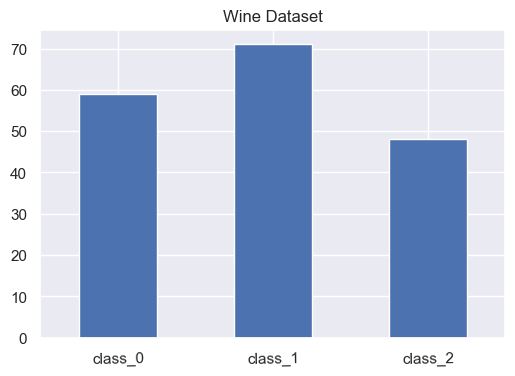

In [39]:
dfw.Class.value_counts(sort=False).plot(kind='bar', rot=True, title='Wine Dataset');

In [40]:
# Target variable
yw = dfw.Class

In [41]:
# Feature Matrix
Xw = dfw.drop(['Class'], axis=1) 
Xw = pd.DataFrame(ss.fit_transform(Xw), columns=Xw.columns)
Xw.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,...,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,1.518613,-0.562250,0.232053,-1.169593,...,0.251717,0.362177,1.847920,1.013009
1,0.246290,-0.499413,-0.827996,-2.490847,...,-0.293321,0.406051,1.113449,0.965242
2,0.196879,0.021231,1.109334,-0.268738,...,0.269020,0.318304,0.788587,1.395148
3,1.691550,-0.346811,0.487926,-0.809251,...,1.186068,-0.427544,1.184071,2.334574
4,0.295700,0.227694,1.840403,0.451946,...,-0.319276,0.362177,0.449601,-0.037874


In [42]:
Xw_train, Xw_test, yw_train, yw_test = train_test_split(Xw, yw, test_size=0.2, random_state=23)
print('Train = %i cases \t Test = %i cases' %(len(Xw_train), len(Xw_test)))

Train = 142 cases 	 Test = 36 cases


In [43]:
# Saving training and testing data
data_train_w = pd.concat([Xw_train, yw_train], axis=1)
data_test_w = pd.concat([Xw_test, yw_test], axis=1)

We use the `solver` `svd` for the Singular Value Decomposition method, the default solver for OVA analysis. We also set `store_covariance` to `True` to store the estimated covariance matrices for each class required for the predict_proba method. 

In [44]:
# Initialize multinomial logistic regression model and fit training data
lda_ova = LinearDiscriminantAnalysis(solver='svd', store_covariance=True)
lda_ova.fit(Xw_train, yw_train)

LinearDiscriminantAnalysis(store_covariance=True)

In [45]:
print('    Coefficients:\n', lda_ova.coef_.round(2))
print('    Intercept:   ', lda_ova.intercept_.round(2))

    Coefficients:
 [[ 2.06  0.23  1.48 -2.58  0.02 -1.41  4.48  0.43 -0.58 -1.63  0.44  2.76
   4.32]
 [-1.44 -0.91 -1.63  1.21  0.08  0.34  0.99  0.51  0.57 -1.64  0.5  -0.11
  -1.98]
 [-0.48  1.05  0.54  1.48 -0.14  1.28 -7.11 -1.3  -0.1   4.48 -1.29 -3.32
  -2.53]]
    Intercept:    [ -8.07  -3.81 -10.98]


Notice we get three equations, one for each class value. Each model  estimates the probability of the respective category given the values of the independent variables.

In [46]:
# Predictions with training cases 
prob = np.round(lda_ova.predict_proba(Xw_train),3)
data_train_w['prob_ova1'] = prob[:,0]
data_train_w['prob_ova2'] = prob[:,1]
data_train_w['prob_ova3'] = prob[:,2]
data_train_w['Class_pred'] = lda_ova.predict(Xw_train)
data_train_w.iloc[:,-5:].head()

,Class,prob_ova1,prob_ova2,prob_ova3,Class_pred
102,class_1,0.0,1.0,0.0,class_1
75,class_1,0.0,1.0,0.0,class_1
3,class_0,1.0,0.0,0.0,class_0
69,class_1,0.0,1.0,0.0,class_1
99,class_1,0.0,1.0,0.0,class_1


In [47]:
# Make predictions on unseen data 
prob = lda_ova.predict_proba(Xw_test)
data_test_w['prob_ova1'] = prob[:,0]
data_test_w['prob_ova2'] = prob[:,1]
data_test_w['prob_ova3'] = prob[:,2]
data_test_w['Class_pred'] = lda_ova.predict(Xw_test)
data_test_w.iloc[:,-5:].head()

,Class,prob_ova1,prob_ova2,prob_ova3,Class_pred
162,class_2,1.008671e-09,1.722546e-04,9.998277e-01,class_2
30,class_0,9.999657e-01,3.426310e-05,8.785428e-12,class_0
174,class_2,1.802286e-13,6.869896e-09,1.000000e+00,class_2
145,class_2,7.285919e-09,4.050152e-04,9.995950e-01,class_2
72,class_1,3.666288e-06,9.999010e-01,9.538034e-05,class_1


In [48]:
# Confusion Matrix
metrics.confusion_matrix(y_true=data_test_w.Class,            # True labels
                         y_pred=data_test_w.Class_pred)       # Predicted labels

array([[11,  0,  0],
       [ 0, 15,  0],
       [ 0,  0, 10]], dtype=int64)

In [49]:
# The accuracy
print('Training Set Accuracy = %.3f' %(lda_ova.score(X=Xw_train, y=yw_train)))
print('Testing Set  Accuracy = %.3f' %(lda_ova.score(X=Xw_test,  y=yw_test)))

Training Set Accuracy = 1.000
Testing Set  Accuracy = 1.000


## References

- CINAR I., KOKLU M. and TASDEMIR S., (2020), Classification of Raisin Grains Using Machine Vision and Artificial Intelligence Methods. Gazi Journal of Engineering Sciences, vol. 6, no. 3, pp. 200-209, December, 2020. DOI: https://dergipark.org.tr/tr/download/article-file/1227592
- Dua, D. and Graff, C. (2019). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html